In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

sns.set()

In [ ]:
df_customers = pd.read_csv("supermarket_customers.csv")
print(df_customers.shape)
df_customers.sample(5)

(2239, 8)


,Education,Marital_Status,NumTotalPurchases,TotalAcceptedCmp,Kids,Day_engaged,Expenses,Income
761,0,1,19,0,2,252,564,79146.0
712,0,1,8,0,1,680,112,33249.0
475,0,0,26,0,1,682,973,62503.0
1343,0,0,6,0,0,684,85,18929.0
654,0,1,15,0,1,1029,365,49431.0


In [ ]:
df_customers_2d = df_customers[['Expenses','Income']]

In [ ]:
# scaler = MinMaxScaler()
scaler = StandardScaler()
customers_2d_scaled = scaler.fit_transform(df_customers_2d)
df_customers_2d_scaled = pd.DataFrame(customers_2d_scaled)
df_customers_2d_scaled.describe()

,0,1
count,2.239000e+03,2.239000e+03
mean,5.013111e-17,-5.637580e-17
std,1.000223e+00,1.000223e+00
min,-9.981757e-01,-2.346716e+00
25%,-8.918880e-01,-7.675483e-01
50%,-3.488246e-01,-2.719133e-02
75%,7.306593e-01,7.621241e-01
max,3.186900e+00,5.159021e+00


In [ ]:
k = 3
km = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
km.fit(df_customers_2d_scaled)

KMeans(n_clusters=3, random_state=0)

In [ ]:
km.labels_

array([2, 1, 0, ..., 2, 0, 0], dtype=int32)

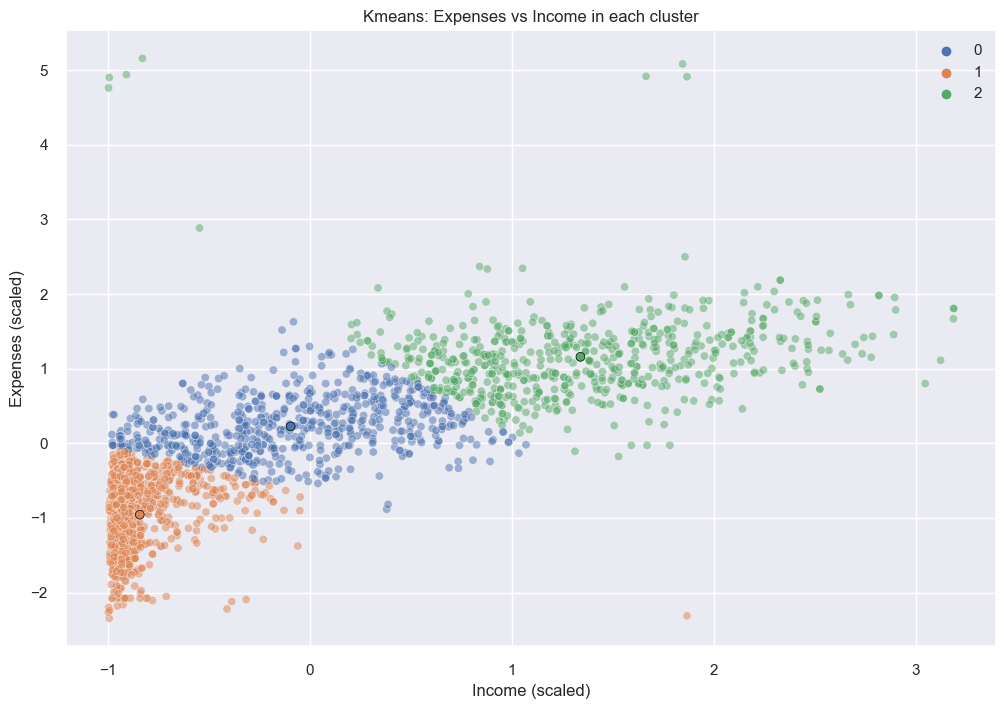

In [ ]:
plt.figure(figsize=(12, 8))
ax  = sns.scatterplot(
    x=df_customers_2d_scaled[0],
    y=df_customers_2d_scaled[1],
    hue=km.labels_,
    palette="deep", alpha = 0.5
)
ax = sns.scatterplot(
    x = km.cluster_centers_[:,0],
    y = km.cluster_centers_[:,1],
    hue=range(k), palette="deep",
    ec='black', legend=False, ax=ax,
    markers = "*", s = 40
)

plt.xlabel("Income (scaled)")
plt.ylabel("Expenses (scaled)")
plt.title('Kmeans: Expenses vs Income in each cluster')
plt.show()

In [ ]:
print("Avg silhouette score = ", silhouette_score(df_customers_2d_scaled,km.labels_))

Avg silhouette score =  0.4700143458457457


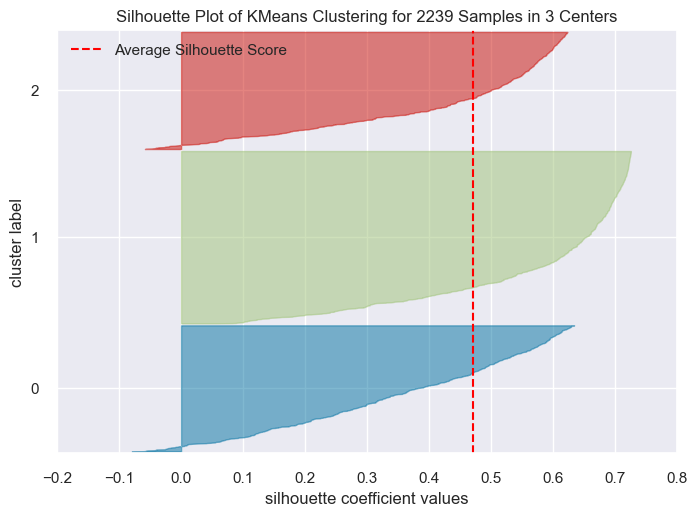

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2239 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(df_customers_2d_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

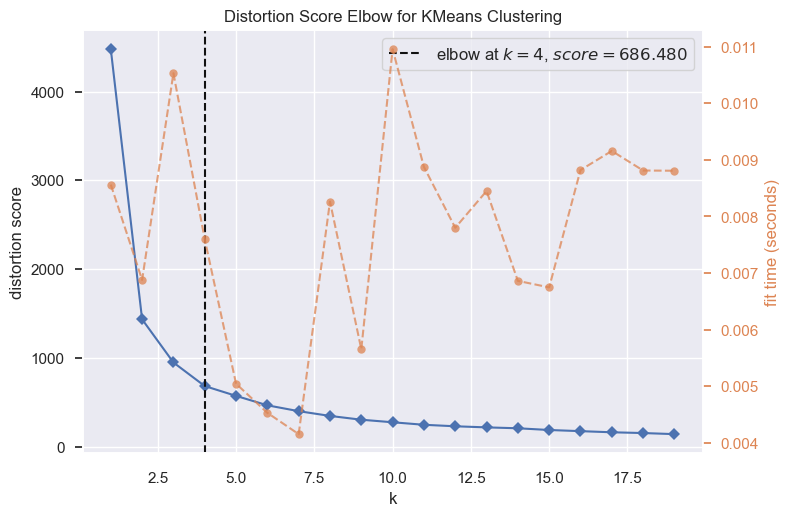

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer = KElbowVisualizer(km, k=(1,20))
visualizer.fit(df_customers_2d_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
best_k = 4
km = KMeans(n_clusters = best_k, init = 'k-means++', random_state = 0)
km.fit(df_customers_2d_scaled)


KMeans(n_clusters=4, random_state=0)

In [ ]:
print(km.cluster_centers_[:,0])
print(km.cluster_centers_[:,1])

[-0.52769168 -0.87923694  0.57919823  1.74116703]
[-0.1271705  -1.13913187  0.71686882  1.31291456]


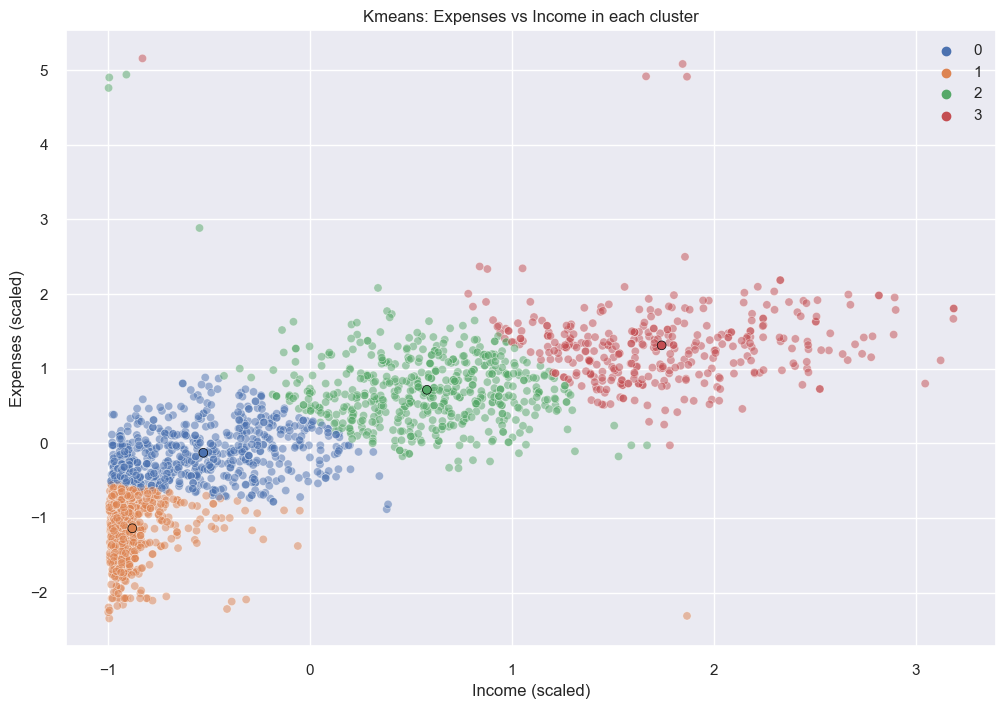

In [ ]:
plt.figure(figsize=(12, 8))
ax  = sns.scatterplot(
    x=df_customers_2d_scaled[0],
    y=df_customers_2d_scaled[1],
    hue=km.labels_,
    palette="deep", alpha = 0.5
)
sns.scatterplot(
    x = km.cluster_centers_[:,0],
    y = km.cluster_centers_[:,1],
    hue=range(best_k), palette="deep",
    ec='black', legend=False, ax=ax,
    markers = "*", s = 40
)

plt.xlabel("Income (scaled)")
plt.ylabel("Expenses (scaled)")
plt.title('Kmeans: Expenses vs Income in each cluster')
plt.show()

In [ ]:
#dbscan = DBSCAN() # eps = 0.5, min_samples = 5
dbscan = DBSCAN(eps=0.5,min_samples=50)
dbscan.fit(df_customers_2d_scaled)

DBSCAN(min_samples=50)

In [ ]:
print("Avg silhouette score = ", silhouette_score(df_customers_2d_scaled,dbscan.labels_))

Avg silhouette score =  0.5452800338756152


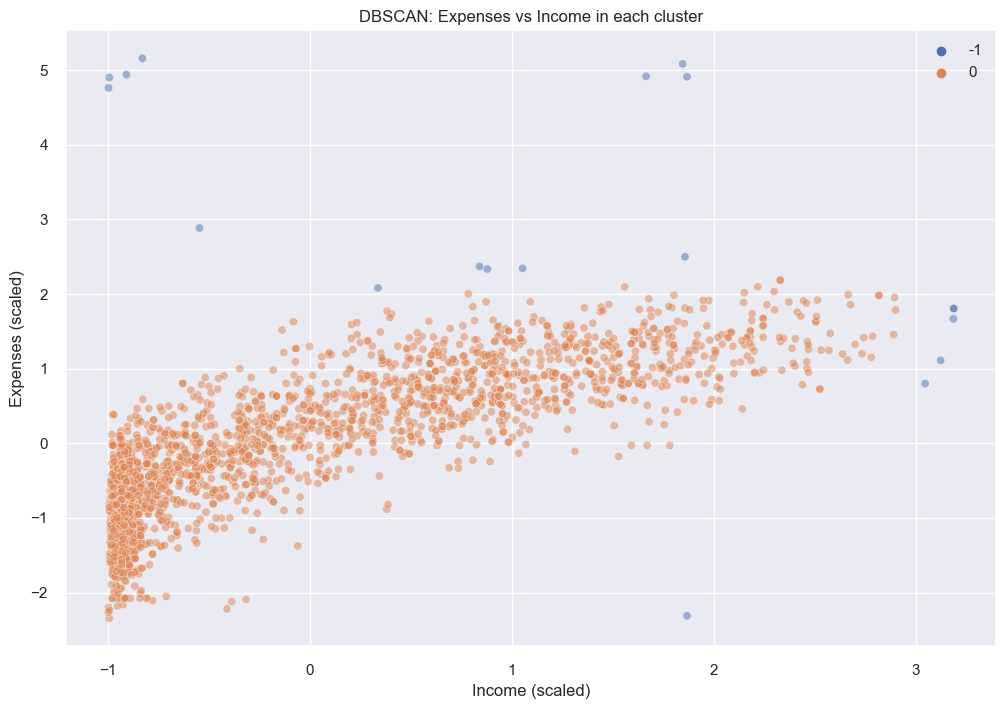

In [ ]:
plt.figure(figsize=(12, 8))
ax  = sns.scatterplot(
    x=df_customers_2d_scaled[0],
    y=df_customers_2d_scaled[1],
    hue=dbscan.labels_,
    palette="deep", alpha = 0.5
)
plt.xlabel("Income (scaled)")
plt.ylabel("Expenses (scaled)")
plt.title('DBSCAN: Expenses vs Income in each cluster')
plt.show()

In [ ]:
hac = AgglomerativeClustering(n_clusters=4, 
                             metric='euclidean', 
#                             linkage='single'
                             linkage='complete',
                            compute_distances = True
                             )
hac.fit(df_customers_2d_scaled)

AgglomerativeClustering(compute_distances=True, linkage='complete',
                        n_clusters=4)

In [ ]:
print("Avg silhouette score = ", silhouette_score(df_customers_2d_scaled,hac.labels_))

Avg silhouette score =  0.5792980815778753


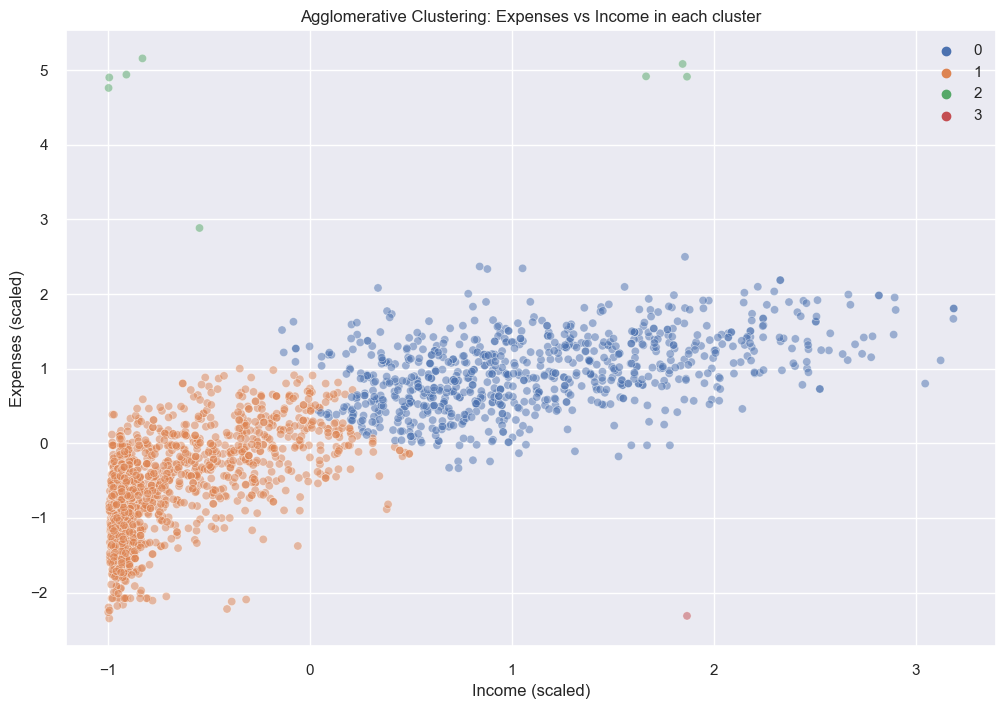

In [ ]:
plt.figure(figsize=(12, 8))
ax  = sns.scatterplot(
    x=df_customers_2d_scaled[0],
    y=df_customers_2d_scaled[1],
    hue=hac.labels_,
    palette="deep", alpha = 0.5
)
plt.xlabel("Income (scaled)")
plt.ylabel("Expenses (scaled)")
plt.title('Agglomerative Clustering: Expenses vs Income in each cluster')
plt.show()

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

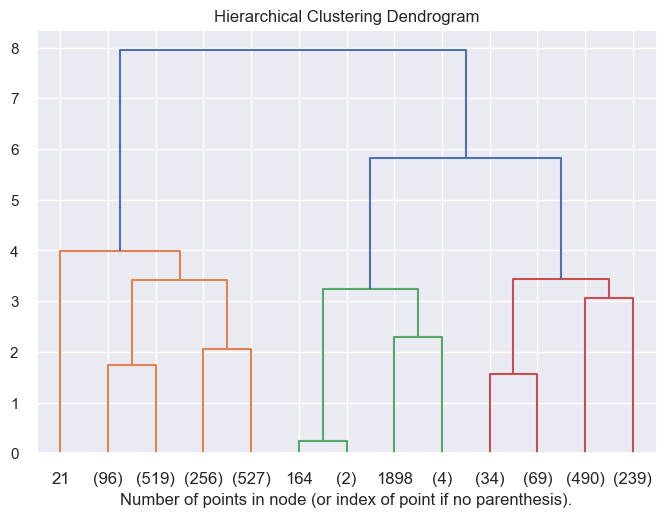

In [ ]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(hac, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

**All columns**

In [ ]:
df_customers.sample(5)

,Education,Marital_Status,NumTotalPurchases,TotalAcceptedCmp,Kids,Day_engaged,Expenses,Income
1110,0,1,16,0,0,675,1156,76773.0
1086,0,1,6,0,2,387,17,24163.0
528,0,1,17,0,0,754,1895,61839.0
1199,0,1,27,0,1,844,1072,59184.0
1903,0,1,9,0,1,434,39,29819.0


In [ ]:
# scaler = MinMaxScaler()
scaler = StandardScaler()
customers_scaled= scaler.fit_transform(df_customers)
df_customers_scaled = pd.DataFrame(customers_scaled)

In [ ]:
def visualize_clusters(data,cluster_out,clust_alg=""):
    # Reduce dimensionality of data using PCA
    pca = PCA()
    pca.fit(data)
    data_pca = pca.transform(data)
    
    #centers_pca = pca.transform(cluster_out.cluster_centers_)
    sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], 
                    hue=cluster_out.labels_,
                   palette="deep",alpha=0.5)
    #sns.scatterplot(centers_pca[:, 0], centers_pca[:, 1])
    
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(clust_alg + ' Clustering with PCA visualization')
    plt.show()

In [ ]:
k = 3
km = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
km.fit(df_customers_scaled)

KMeans(n_clusters=3, random_state=0)

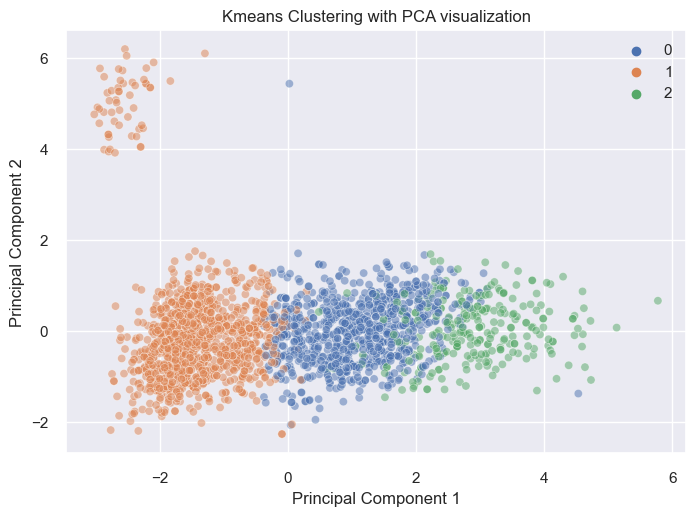

In [ ]:
visualize_clusters(df_customers_scaled,km,"Kmeans")

In [ ]:
df_customers_kmeans = df_customers.copy()
df_customers_kmeans['Cluster'] = km.labels_  # It will contain the predicted clusters for each observation in our data set
# number of costumer in each cluster/segment
df_customers_kmeans['Cluster'].value_counts()

1    1137
0     839
2     263
Name: Cluster, dtype: int64

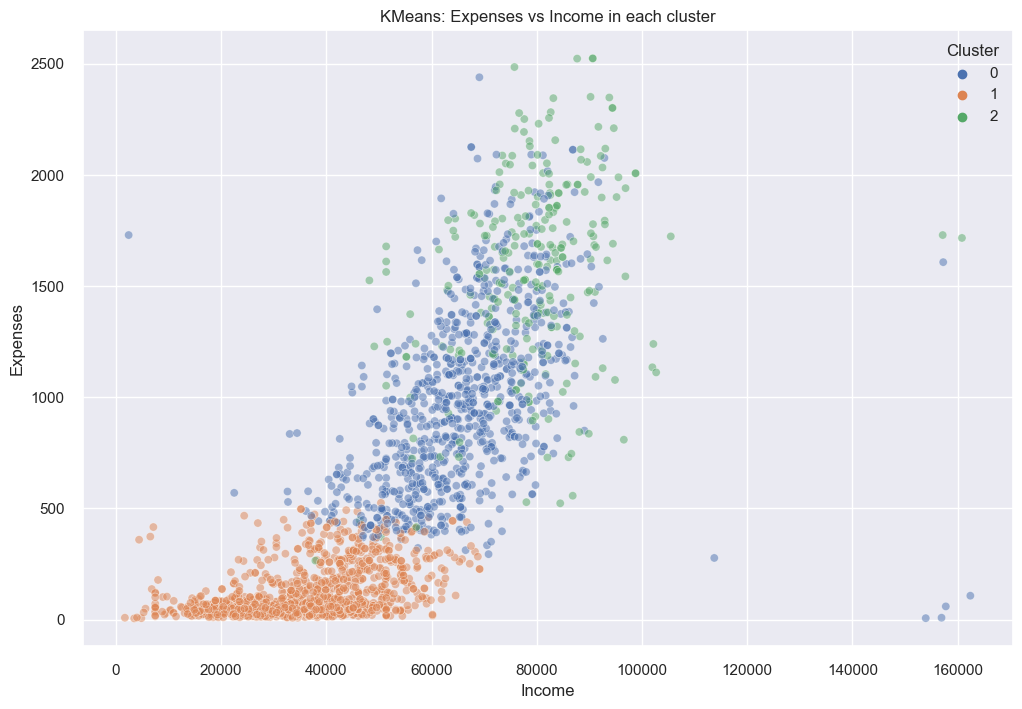

In [ ]:
plt.figure(figsize=(12, 8))
ax  = sns.scatterplot(
    x=df_customers_kmeans['Income'],
    y=df_customers_kmeans['Expenses'],
    hue=df_customers_kmeans['Cluster'],
    palette="deep", alpha = 0.5
)
plt.title('KMeans: Expenses vs Income in each cluster')
plt.show()

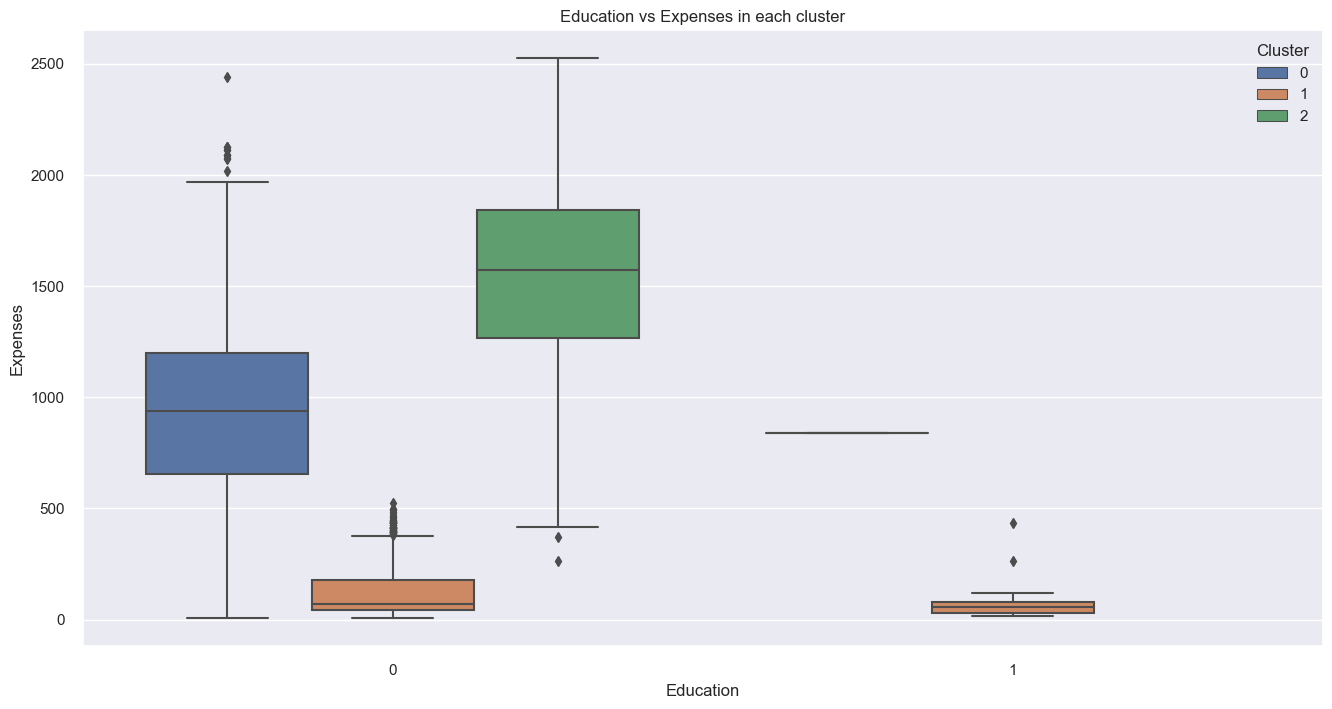

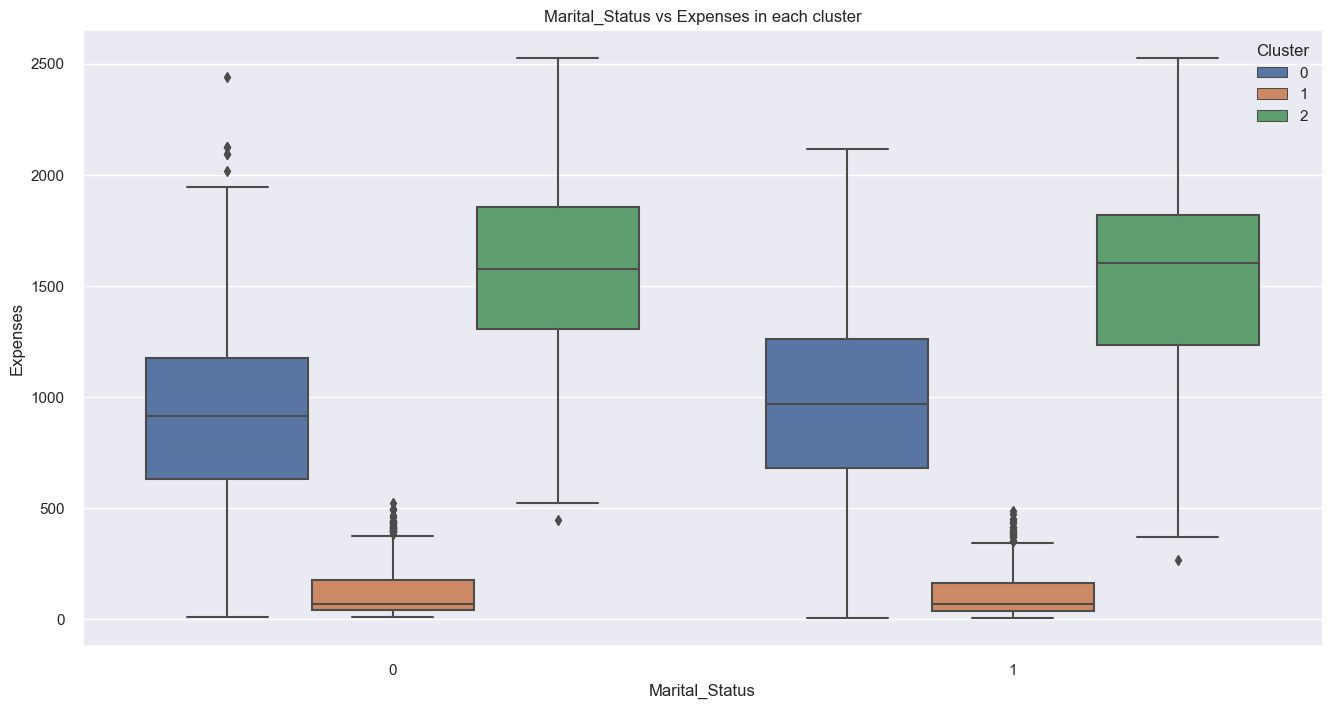

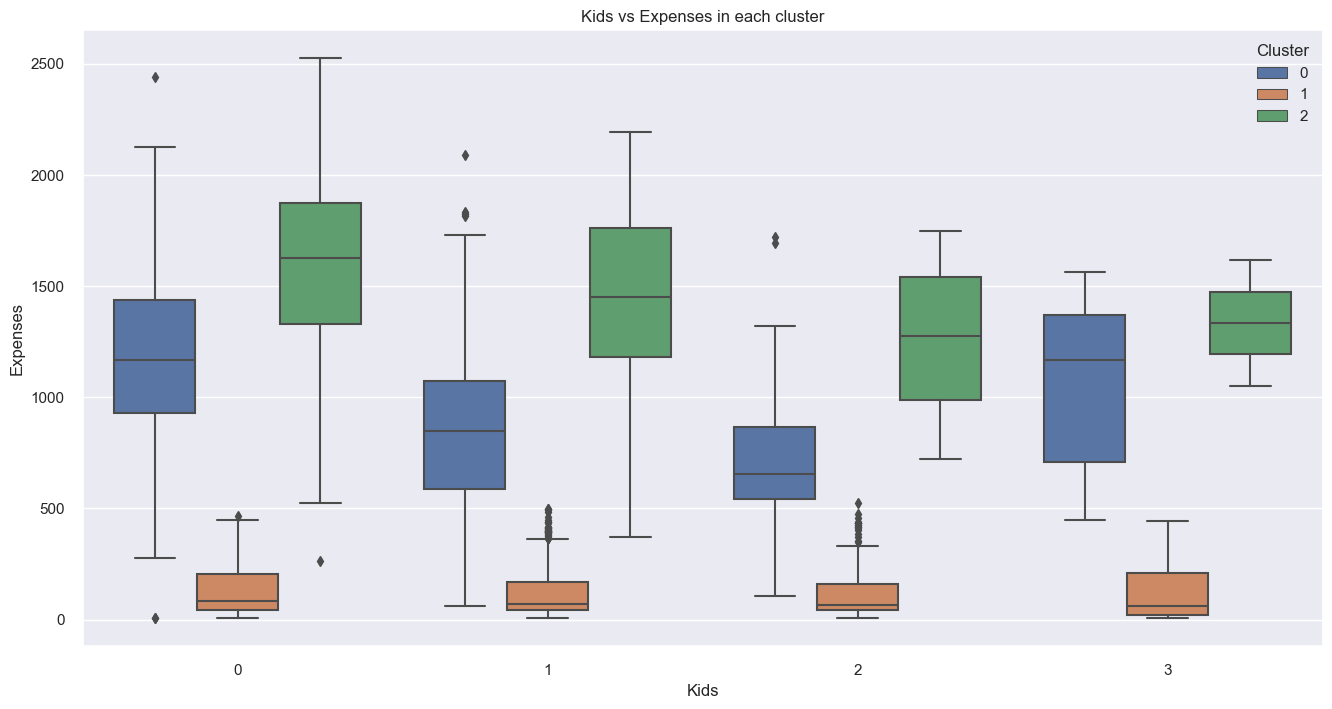

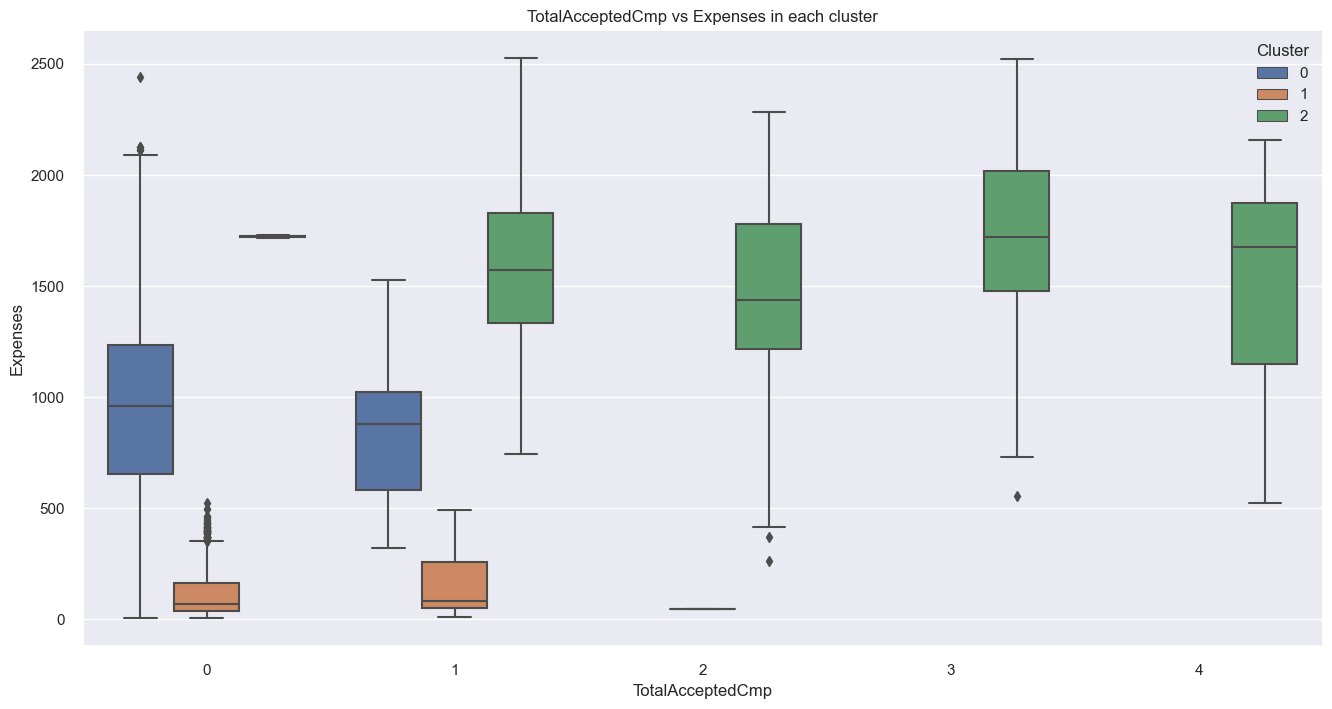

In [ ]:
for col in ['Education','Marital_Status','Kids','TotalAcceptedCmp']:
    plt.figure(figsize=(16, 8))
    sns.boxplot(
        x=df_customers_kmeans[col],
        y=df_customers_kmeans['Expenses'],
        hue=df_customers_kmeans['Cluster'],
        palette="deep"
    )
    plt.title(col+' vs Expenses in each cluster')
    plt.show()

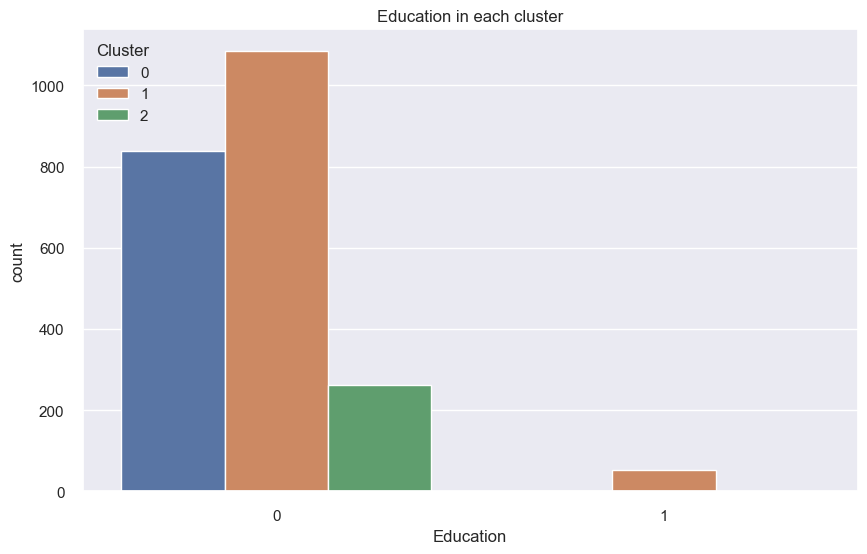

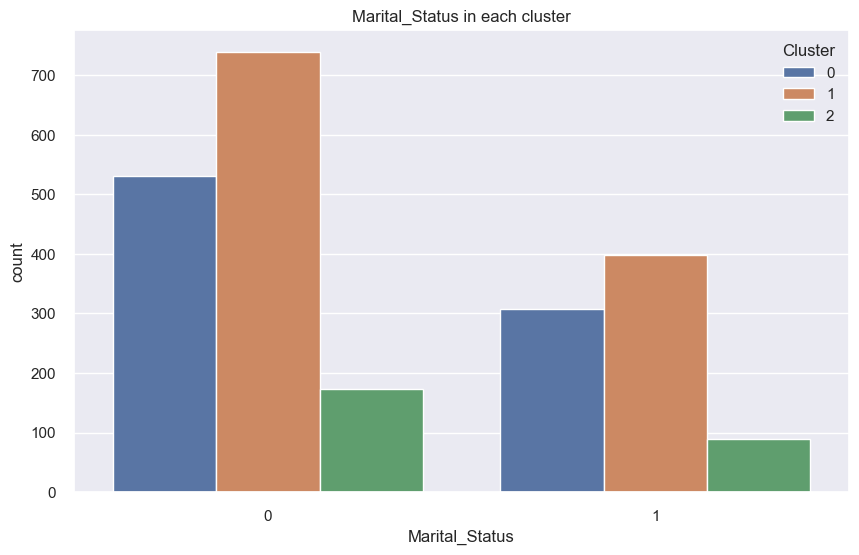

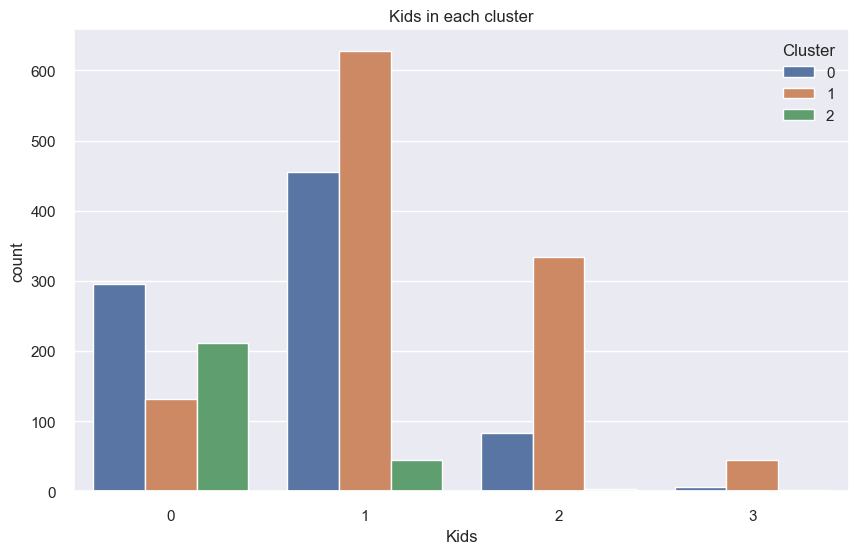

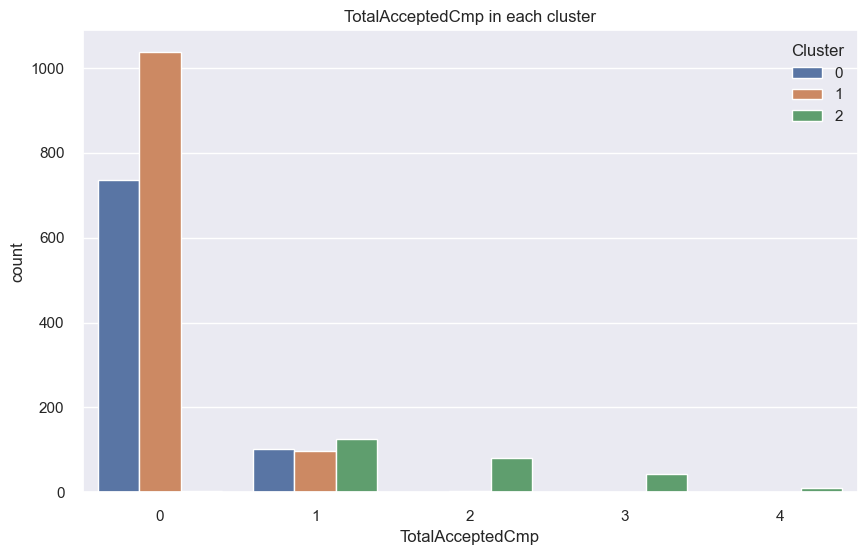

In [ ]:
for col in ['Education','Marital_Status','Kids','TotalAcceptedCmp']:
    plt.figure(figsize=(10, 6))
    sns.countplot(
        x=df_customers_kmeans[col],
        hue=df_customers_kmeans['Cluster'],
        palette="deep"
    )
    plt.title(col+' in each cluster')
    plt.show()

In [ ]:
df_customers_special = df_customers.loc[df_customers_kmeans['Cluster'] == 2]
df_customers_special.describe()

,Education,Marital_Status,NumTotalPurchases,TotalAcceptedCmp,Kids,Day_engaged,Expenses,Income
count,263.0,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,0.0,0.342205,21.068441,1.760456,0.224335,525.961977,1554.650190,79164.429658
std,0.0,0.475353,4.732044,0.886516,0.501008,237.104767,431.271367,13053.607577
min,0.0,0.000000,1.000000,0.000000,0.000000,27.000000,265.000000,37929.000000
25%,0.0,0.000000,18.000000,1.000000,0.000000,347.000000,1269.000000,72936.500000
50%,0.0,0.000000,21.000000,2.000000,0.000000,509.000000,1574.000000,80067.000000
75%,0.0,1.000000,24.000000,2.000000,0.000000,699.500000,1843.000000,84906.000000
max,0.0,1.000000,44.000000,4.000000,3.000000,1089.000000,2525.000000,160803.000000


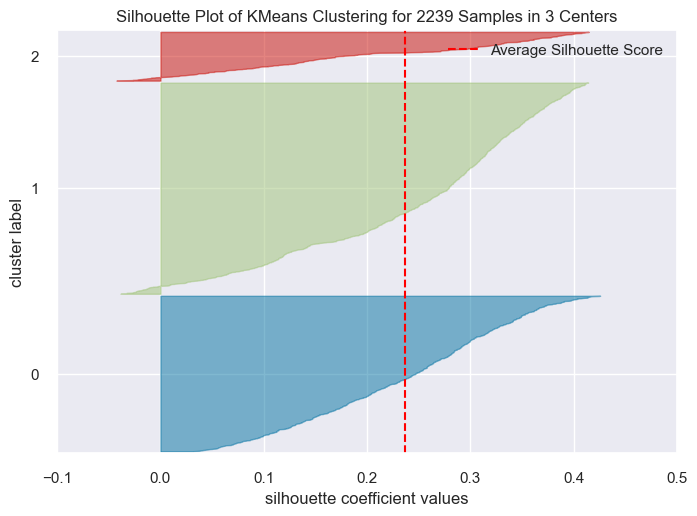

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2239 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(df_customers_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

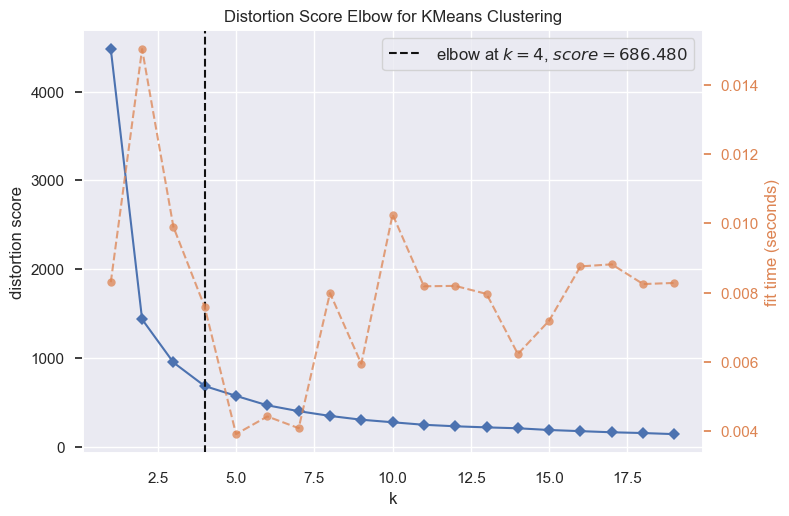

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer = KElbowVisualizer(km, k=(1,20))
visualizer.fit(df_customers_2d_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
best_k = 4
km = KMeans(n_clusters = best_k, init = 'k-means++',random_state=0)
km.fit(df_customers_scaled)

KMeans(n_clusters=4, random_state=0)

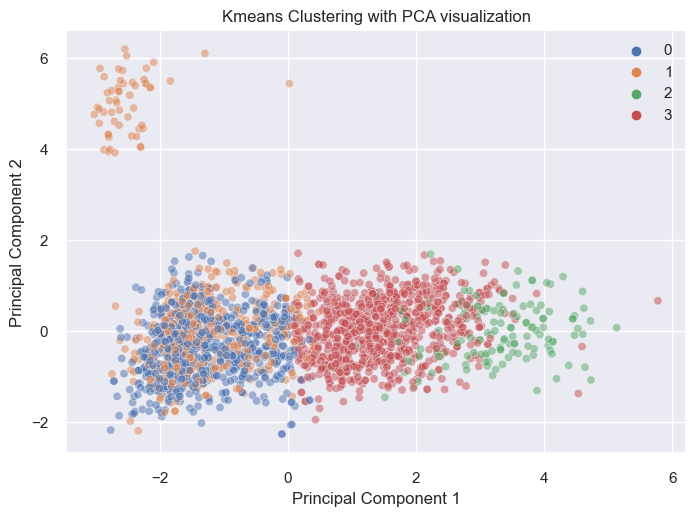

In [ ]:
visualize_clusters(df_customers_scaled,km,"Kmeans")

In [ ]:
## try different values for eps and MinPts
silhouette_scores = []

#for eps in np.linspace(0.1,1,10):
#    for minPts in range(5, 51,10):
for eps in [0.9, 1.1,1.5,1.7,1.9,2.1,2.3,2.5]:
    for minPts in [5,10,20,50]:
        dbscan = DBSCAN(eps=eps,min_samples=minPts)
        dbscan.fit(df_customers_scaled)
        labels = dbscan.labels_
        s = silhouette_score(df_customers_scaled, labels)
        print("For eps = ",eps, "minPts = ",minPts,"silhouette score =",round(s,2))
        
        silhouette_scores.append(s)
        
#print(silhouette_scores)

For eps =  0.9 minPts =  5 silhouette score = -0.02
For eps =  0.9 minPts =  10 silhouette score = -0.05
For eps =  0.9 minPts =  20 silhouette score = -0.06
For eps =  0.9 minPts =  50 silhouette score = -0.04
For eps =  1.1 minPts =  5 silhouette score = 0.03
For eps =  1.1 minPts =  10 silhouette score = 0.0
For eps =  1.1 minPts =  20 silhouette score = -0.01
For eps =  1.1 minPts =  50 silhouette score = -0.05
For eps =  1.5 minPts =  5 silhouette score = 0.16
For eps =  1.5 minPts =  10 silhouette score = 0.18
For eps =  1.5 minPts =  20 silhouette score = 0.17
For eps =  1.5 minPts =  50 silhouette score = 0.17
For eps =  1.7 minPts =  5 silhouette score = 0.19
For eps =  1.7 minPts =  10 silhouette score = 0.18
For eps =  1.7 minPts =  20 silhouette score = 0.18
For eps =  1.7 minPts =  50 silhouette score = 0.18
For eps =  1.9 minPts =  5 silhouette score = 0.19
For eps =  1.9 minPts =  10 silhouette score = 0.19
For eps =  1.9 minPts =  20 silhouette score = 0.18
For eps =  1

In [ ]:
best_eps = 2.5 # 2.5, 0.5 
best_minPts = 50 # 50, 20
dbscan = DBSCAN(eps=best_eps,min_samples=best_minPts)
dbscan.fit(df_customers_scaled)
print(len(dbscan.core_sample_indices_))

2111


In [ ]:
np.max(dbscan.labels_)

0

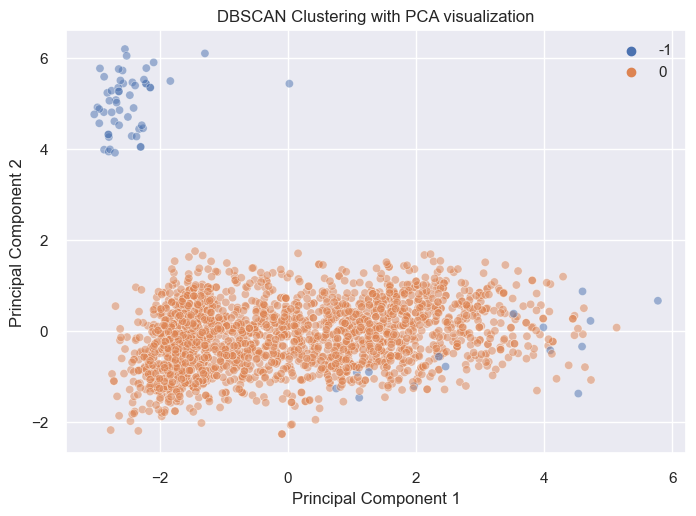

In [ ]:
visualize_clusters(df_customers_scaled,dbscan,"DBSCAN")

In [ ]:
hac = AgglomerativeClustering(n_clusters=4, 
                             metric='euclidean', 
                             linkage='complete' 
                             )
hac.fit(df_customers_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=4)

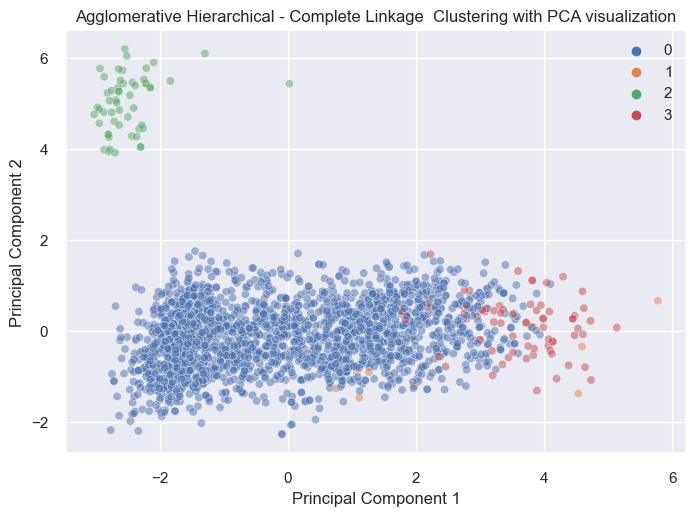

In [ ]:
visualize_clusters(df_customers_scaled,hac,"Agglomerative Hierarchical - Complete Linkage ")

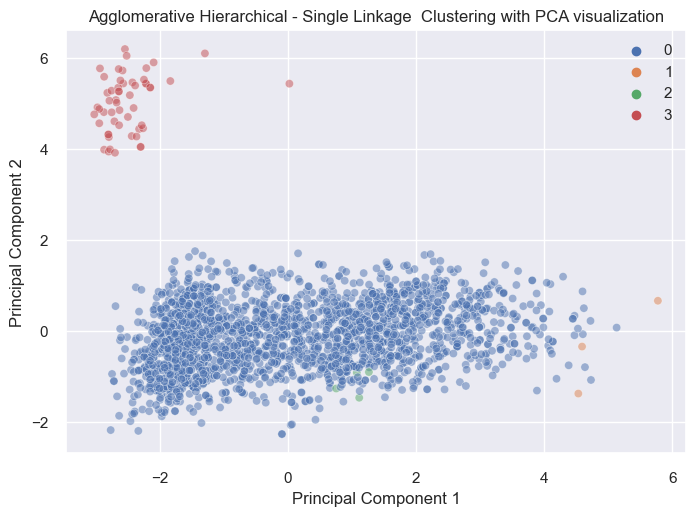

In [ ]:
hac = AgglomerativeClustering(n_clusters=4, 
                             metric='euclidean', 
                             linkage='single'
                             )
hac.fit(df_customers_scaled)
visualize_clusters(df_customers_scaled,hac, "Agglomerative Hierarchical - Single Linkage ")

In [ ]:
for nclusters in range(2,11):
    hac = AgglomerativeClustering(n_clusters=nclusters, 
                             metric='euclidean', 
                             linkage='complete' 
                             )
    hac.fit(df_customers_scaled)
    s = silhouette_score(df_customers_scaled, hac.labels_)
    print("For nclusters = ",nclusters,"silhouette score =",round(s,2))

For nclusters =  2 silhouette score = 0.37
For nclusters =  3 silhouette score = 0.4
For nclusters =  4 silhouette score = 0.39
For nclusters =  5 silhouette score = 0.1
For nclusters =  6 silhouette score = 0.1
For nclusters =  7 silhouette score = 0.16
For nclusters =  8 silhouette score = 0.16
For nclusters =  9 silhouette score = 0.13
For nclusters =  10 silhouette score = 0.11


In [ ]:
for nclusters in range(2,11):
    hac = AgglomerativeClustering(n_clusters=nclusters, 
                             metric='euclidean', 
                             linkage='single' 
                             )
    hac.fit(df_customers_scaled)
    s = silhouette_score(df_customers_scaled, hac.labels_)
    print("For nclusters = ",nclusters,"silhouette score =",round(s,2))

For nclusters =  2 silhouette score = 0.54
For nclusters =  3 silhouette score = 0.44
For nclusters =  4 silhouette score = 0.41
For nclusters =  5 silhouette score = 0.34
For nclusters =  6 silhouette score = 0.29
For nclusters =  7 silhouette score = 0.28
For nclusters =  8 silhouette score = 0.28
For nclusters =  9 silhouette score = 0.27
For nclusters =  10 silhouette score = 0.25
